<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Hypothesis_Testing_Two_Sample_t_Test_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This nb demonstrates how to run two-sample t tests using scipy ttest function.

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate') **bold text**
Ref. https://www.kite.com/python/docs/scipy.stats.ttest_1samp

**Example 1: H0: male_IQ = Female_IQ H1: male_IQ <> female_IQ**
variance is unknown in this case

In [1]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt

In [2]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
# the sep-',' argument in the read statement should be used in some cases if ; does not work
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


# Step 1. Test of Equal Variance of Two Populations


In [3]:
#F test for variances of two populations
# the following function is user defined
# define a F test
def f_test(x,y):
  x=np.array(x)
  y=np.array(y)
  f=np.var(x,ddof=1)/np.var(y, ddof=1) # cal F test statistic
  dfn=x.size-1
  dfd=y.size-1
  p=1-stats.f.cdf(f,dfn, dfd) #find p-value of F test statistics
  return f, p

male_viq=data[data['Gender']=='Male']['VIQ']
female_viq=data[data['Gender']=='Female']['VIQ']
f_test(male_viq, female_viq)

(1.3999574131873427, 0.23514586725149234)

**Since p value is large (>0.05), we cannot reject H0: variance 1 = variance 2
Which of the following block should you choose?**

# Step 2. the F test result suggests to pool two population to estimate the variance

In [ ]:
#two sample t-test 1: assume the variance is the same (default)
male_viq=data[data['Gender']=='Male']['VIQ']
female_viq=data[data['Gender']=='Female']['VIQ']
stats.ttest_ind(female_viq, male_viq, equal_var=True)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [ ]:
#two sample t-test method 2: the variances are not the same
stats.ttest_ind(female_viq, male_viq, equal_var=False)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44466074519419097)

**The above p-value is large, which suggests H0: mu 1 = mu 2 can not be rejected.**

# Example 2. Testing of two catalysts
Ref. Montgomery Intro to SQC Example 4.9

In [5]:
# 95% confidence interval of Two sample variance is pooled
# see Montgomery 7ed (4.56) or 8ed (pp 134)
# Example: Montgomery 7ed Ex 4.9
x1=[91.50, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21]
x2=[89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75]
n1=len(x1)
n2=len(x2)
mean1=np.mean(x1)
mean2=np.mean(x2)
sigma1=np.std(x1, ddof=1) #ddof=1 so that N-! is used in the diviser
sigma2=np.std(x2, ddof=1)
Sp= math.sqrt(((n1-1)*sigma1**2 + (n2-1)*sigma2**2)/(n1+n2-2))
t0= (mean1-mean2)/(Sp * math.sqrt(1/n1 +1/n2))
LCI= mean1-mean2 - Sp * stats.t.ppf(q=0.925, df=n1+n2-2) * math.sqrt(1/n1 +1/n2)
UCI= mean1-mean2 + Sp * stats.t.ppf(q=0.975, df=n1+n2-2) * math.sqrt(1/n1 +1/n2)
print("Sp=", Sp)
print("(t0, critical value)=(", t0, stats.t.ppf(q=0.975, df=n1+n2-2),")")
print("(LCI, UCI) = (", LCI, UCI, ")")

Sp= 2.7008616350025383
(t0, critical value)=( -0.35359086434617987 2.1447866879169273 )
(LCI, UCI) = ( -2.534334508258147 2.4188860403295034 )


In [7]:
# run F test to verify that the pooled variance estimate is appropriate
f_test(x1, x2)

(0.6390651444180793, 0.7154344825287008)

The p value of 0.71 is very large, H0 of equal variance cannot be rejected

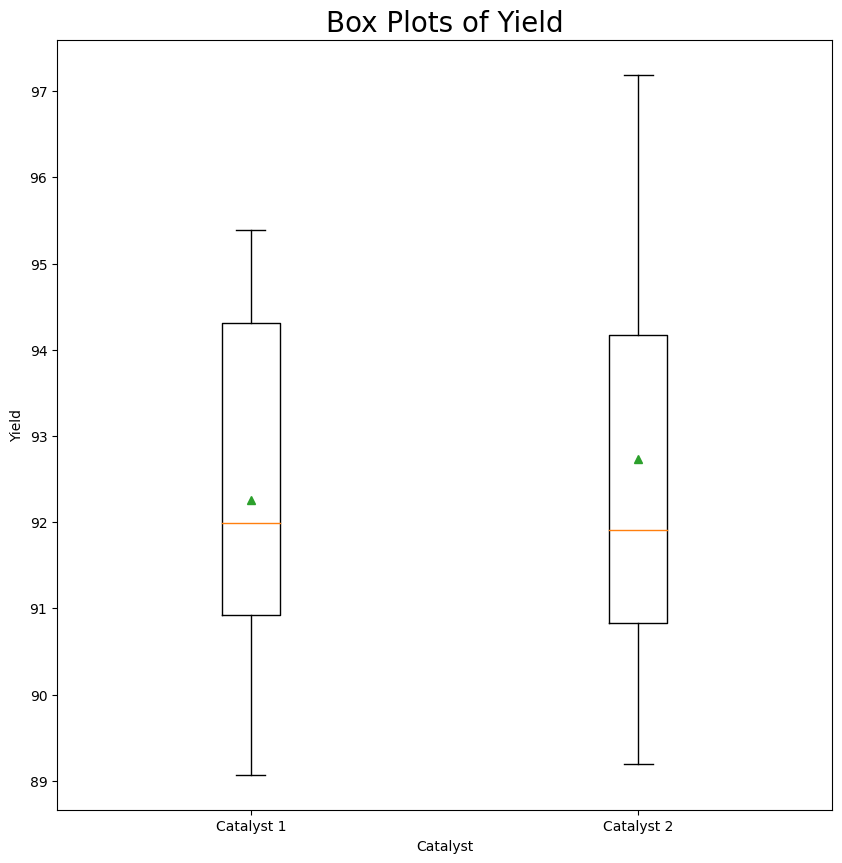

In [8]:
# Box Plots
# Box plots by populations

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plots of Yield", fontsize= 20)
ax.set

data2=[x1, x2]

ax.boxplot(data2,
           labels= ['Catalyst 1', 'Catalyst 2'],
           showmeans= True)

plt.xlabel("Catalyst")
plt.ylabel("Yield")

plt.show()

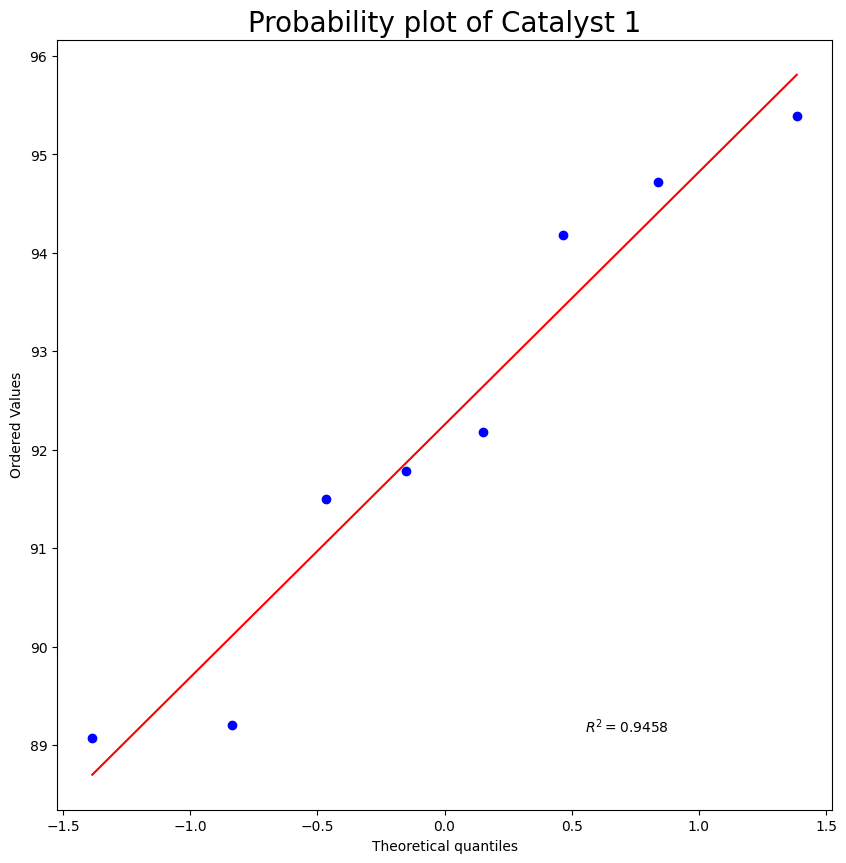

In [9]:
# Probability Plots

# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(x1, plot= plt, rvalue= True)
ax.set_title("Probability plot of Catalyst 1", fontsize= 20)
ax.set

plt.show()

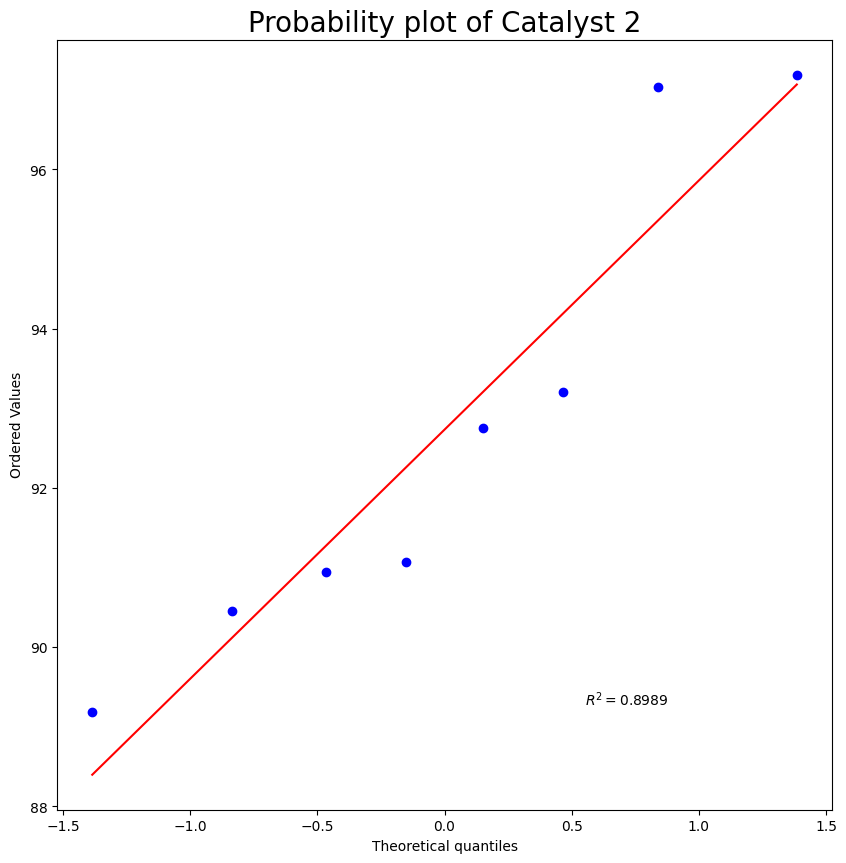

In [10]:
# Probability Plots

# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(x2, plot= plt, rvalue= True)
ax.set_title("Probability plot of Catalyst 2", fontsize= 20)
ax.set

plt.show()

# Your turn:
1. are the two population normally distributed?
2. what information does the box plot provide?